# Introduction

We currently have data for many stores that vary in:

*  **Store ID** : ( Index ) ID of the particular store.

*  **Store_Area** : Physical Area of the store in yard square.

*  **Items_Available** :  Number of different items available in the corresponding store.

*  **Daily_Customer_Count** : Number of customers who visited to stores on an average over month.

*  **Store_Sales** : Sales in (US $) that stores made.

* **Store_Size**: This column was created based on the `Store_Area` column.  
  Stores were divided into four size categories according to their area,  
  in order to make comparisons easier and more meaningful during the analysis.


### Step 1: Data Exploration & Cleaning

We will begin by exploring the data to understand its structure.  
Then, we'll check for any **missing** or **duplicate** values to ensure we clean the data properly.

### Step 2: Answering Key Questions

Once the data is clean, we’ll start analyzing and answering some important questions, such as:

- Which stores have **more available products**?
- Which stores have **higher sales**?
- Does the **number of customers** increase based on **store size** and **product availability**?

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
path=r"/kaggle/input/stores-area-and-sales-data/Stores.csv"

market_df=pd.read_csv(path)


In [4]:
market_df.sample(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
138,139,1795,2187,300,76530
551,552,1883,2262,570,42240
488,489,1230,1466,730,67100
192,193,1462,1770,1070,67710
22,23,1719,2065,950,52780
847,848,1474,1745,970,63020
734,735,1743,2061,860,81930
561,562,1767,2158,530,41540
506,507,1784,2142,950,64010
327,328,1808,2157,730,56810


In [5]:
market_df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [6]:
market_df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [7]:
# There is isuss in Store ID name there is a space in the end

market_df=market_df.rename(columns={'Store ID ' :'Store ID'})

In [8]:
market_df=market_df.set_index("Store ID")

In [9]:
market_df.head(10)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620
6,1442,1733,760,45260
7,1542,1858,1030,72240
8,1261,1507,1020,37720
9,1090,1321,680,46310


In [10]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [11]:
market_df.duplicated().sum()

0

In [12]:
market_df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [13]:
market_df.describe().round(1)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.0,896.0,896.0,896.0
mean,1485.4,1782.0,786.4,59351.3
std,250.2,299.9,265.4,17190.7
min,775.0,932.0,10.0,14920.0
25%,1316.8,1575.5,600.0,46530.0
50%,1477.0,1773.5,780.0,58605.0
75%,1653.5,1982.8,970.0,71872.5
max,2229.0,2667.0,1560.0,116320.0


# 50% is the median where we see that  mean and median almost the same 
* **We Found that Data is Normal Distrubited**

In [14]:
market_df.describe().loc[["mean","50%"]].round(1)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
mean,1485.4,1782.0,786.4,59351.3
50%,1477.0,1773.5,780.0,58605.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

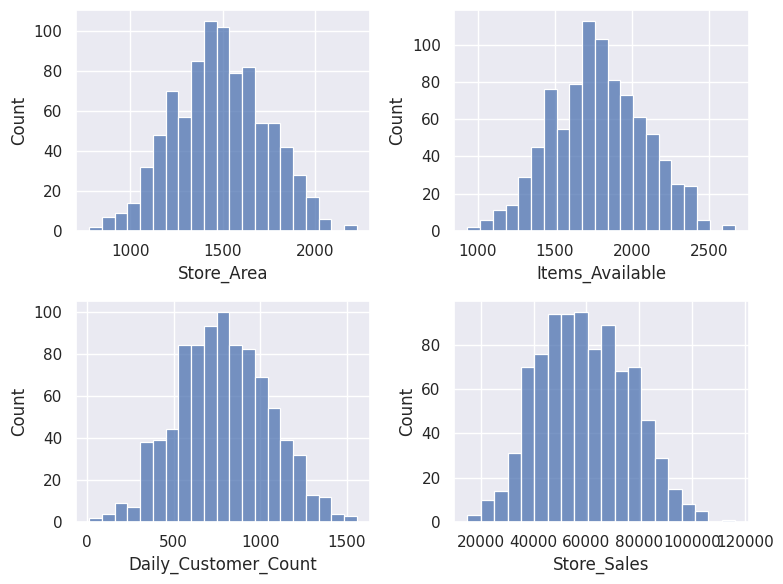

In [15]:
fig , ax = plt.subplots(2,2,figsize=(8, 6))

sns.histplot(market_df["Store_Area"],ax=ax[0,0])
sns.histplot(market_df["Items_Available"],ax=ax[0,1])
sns.histplot(market_df["Daily_Customer_Count"],ax=ax[1,0])
sns.histplot(market_df["Store_Sales"],ax=ax[1,1])


plt.tight_layout()  
plt.show()

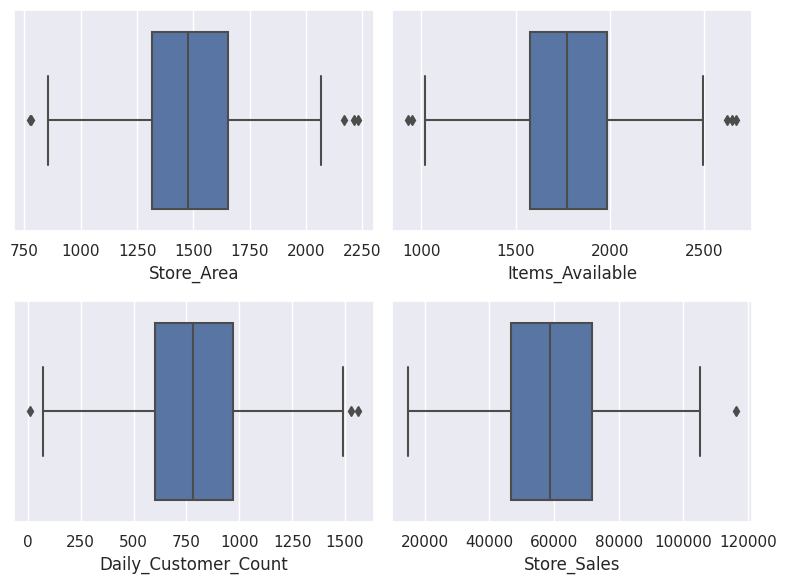

In [16]:
#See if there is Outliers in data
fig , ax = plt.subplots(2,2,figsize=(8, 6))

sns.boxplot(x=market_df["Store_Area"],ax=ax[0,0])
sns.boxplot(x=market_df["Items_Available"],ax=ax[0,1])
sns.boxplot(x=market_df["Daily_Customer_Count"],ax=ax[1,0])
sns.boxplot(x=market_df["Store_Sales"],ax=ax[1,1])


plt.tight_layout()  
plt.show()

# Handling Outliers

In [17]:
def calc_upper_lower(col):
    the_25th = col.quantile(0.25)
    the_75th = col.quantile(0.75)
    IQR = the_75th - the_25th
    up = the_75th + (IQR * 1.5)
    low = the_25th - (IQR * 1.5)
    return up, low

In [18]:
market_df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [19]:
upper_area ,lower_area = calc_upper_lower(market_df["Store_Area"])
upper_item , lower_item = calc_upper_lower(market_df["Items_Available"])
upper_count , lower_count = calc_upper_lower(market_df["Daily_Customer_Count"])
upper_sales , lower_sales = calc_upper_lower(market_df["Store_Sales"])

print(f"Area : {upper_area ,lower_area} \nItem {upper_item , lower_item }\nCount {upper_count , lower_count}\nSales {upper_sales , lower_sales}")

Area : (2158.625, 811.625) 
Item (2593.625, 964.625)
Count (1525.0, 45.0)
Sales (109886.25, 8516.25)


In [20]:
# Display stitcal info to compare min and max with the upper  and lower we calc by the IQR
market_df.describe().round(1)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.0,896.0,896.0,896.0
mean,1485.4,1782.0,786.4,59351.3
std,250.2,299.9,265.4,17190.7
min,775.0,932.0,10.0,14920.0
25%,1316.8,1575.5,600.0,46530.0
50%,1477.0,1773.5,780.0,58605.0
75%,1653.5,1982.8,970.0,71872.5
max,2229.0,2667.0,1560.0,116320.0


#### I Found that Outliers not extreme out of range and above the Data  was Normalized Distrubited
---

# See the relation between columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

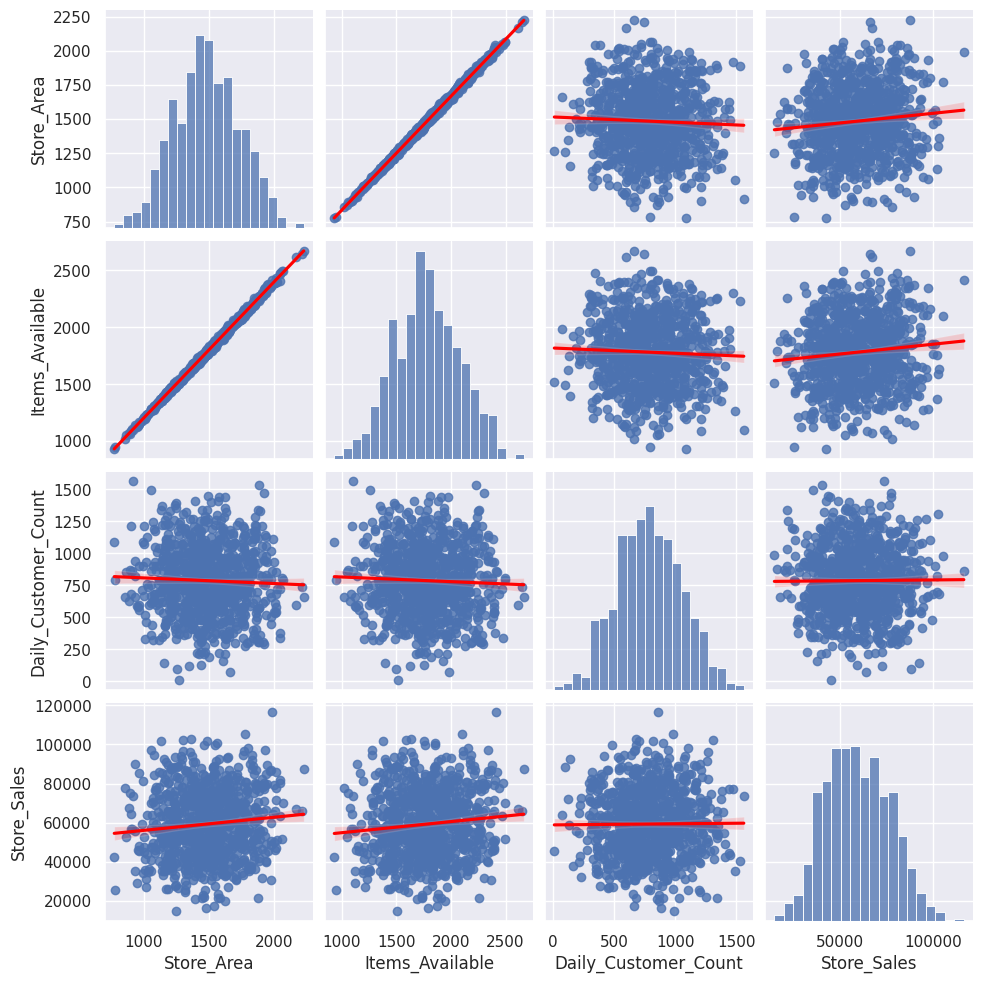

In [21]:
sns.pairplot(market_df,kind='reg',markers=["o"],plot_kws={'line_kws': {'color': 'red'}})

#### Here we see
1.  **Items availablity increase by increasing store Area** 
2. **The Data is normal distrubited**
3. **Rest columns have weak relation between each others**
4. **The rest of the columns are concentrated within a specific range.**

<br><br><hr>

# show the corrlation between column by numbers

<Axes: >

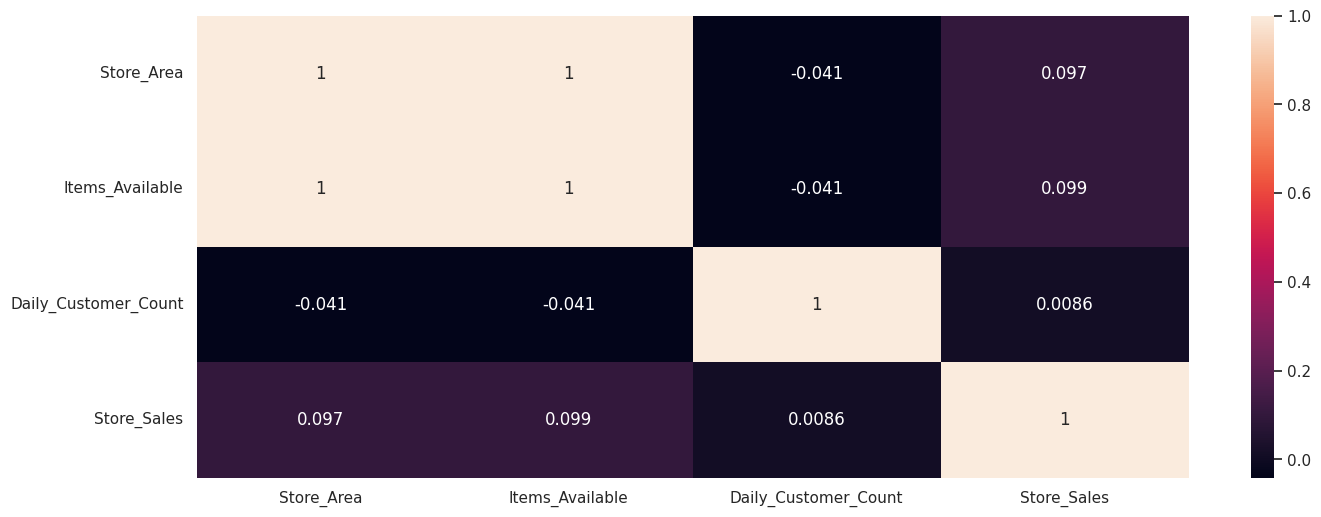

In [22]:

plt.figure(figsize=(16,6))
sns.heatmap(market_df.corr(),annot= True,)

#### here items availablity and store area اhas a strong positive correlation between them.
#### The rest columns have positive and negative corrlaton with each other

In [23]:
fig = plt.figure(figsize=(16,6))
tight = plt.tight_layout()  
sh = plt.show()

<Figure size 1600x600 with 0 Axes>

In [24]:
market_df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

# The Common of the Stores Area is bewteen 1250 to 1750 yard square

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


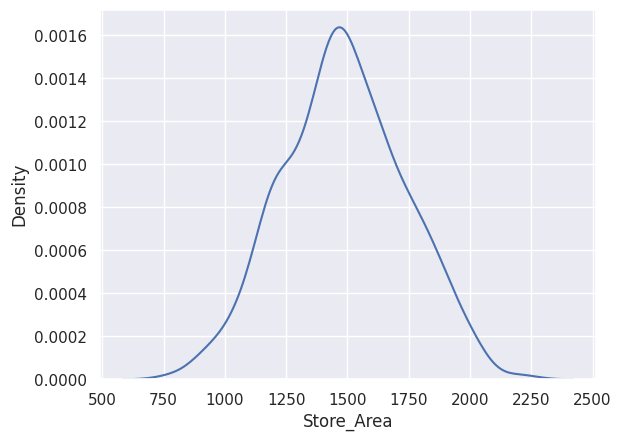

In [25]:
fig
sns.kdeplot(market_df["Store_Area"])
tight 
sh 

In [26]:
market_df["Store_Area"].describe()

count     896.000000
mean     1485.409598
std       250.237011
min       775.000000
25%      1316.750000
50%      1477.000000
75%      1653.500000
max      2229.000000
Name: Store_Area, dtype: float64

In [27]:
# here i will make new column from store area but it will be categorical
(2229-775)/4


363.5

In [28]:
market_df["Store_Size"]= None

In [29]:
market_df.loc[(market_df["Store_Area"]>= 775) & (market_df["Store_Area"] < (775 + (364*1))),"Store_Size"] ="Small" 
market_df.loc[(market_df["Store_Area"]>= (775 + (364*1))) & (market_df["Store_Area"] < (775 + (364*2))),"Store_Size"] ="Medium"
market_df.loc[(market_df["Store_Area"]>= (775 + (364*2))) & (market_df["Store_Area"] < (775 + (364*3))),"Store_Size"] ="Large"
market_df.loc[(market_df["Store_Area"]>= (775 + (364*3))),"Store_Size"] ="Very Large"

In [30]:
market_df["Store_Size"].value_counts()

Store_Size
Medium        419
Large         346
Small          68
Very Large     63
Name: count, dtype: int64

# We can see that Most stores in the data is the meduim Size

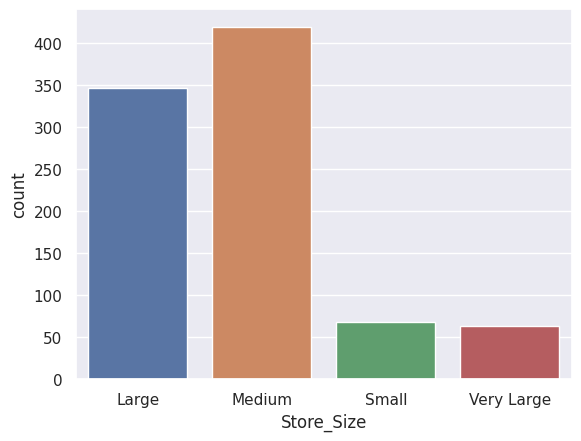

In [31]:
fig
sns.countplot(x= market_df["Store_Size"])
tight
sh

# We see that Item Avaliablty depends on Store Size
* so we can see that very lareg stores have the biggest item availabilty 

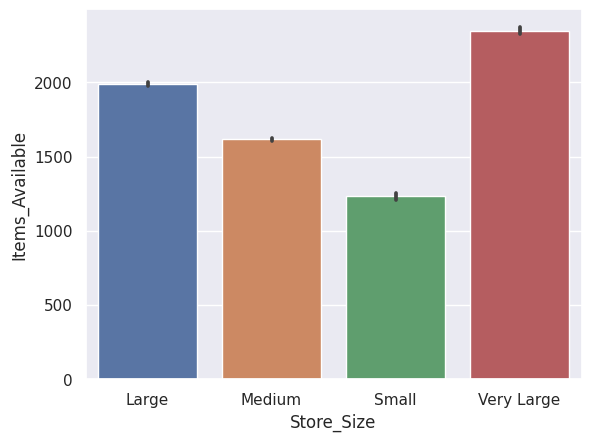

In [32]:
fig
sns.barplot(x= market_df["Store_Size"],y=market_df["Items_Available"])
tight
sh

# We can see that count of Customers is almost the same and not depend on store size

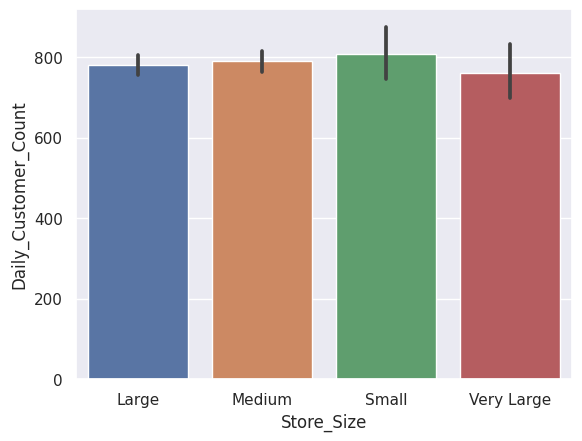

In [33]:
fig
sns.barplot(x= market_df["Store_Size"],y=market_df["Daily_Customer_Count"])
tight
sh

# We can see the sales is almost the same 
#### but we can see in very large store have the highest sales because it have the highest Item Avaliablty

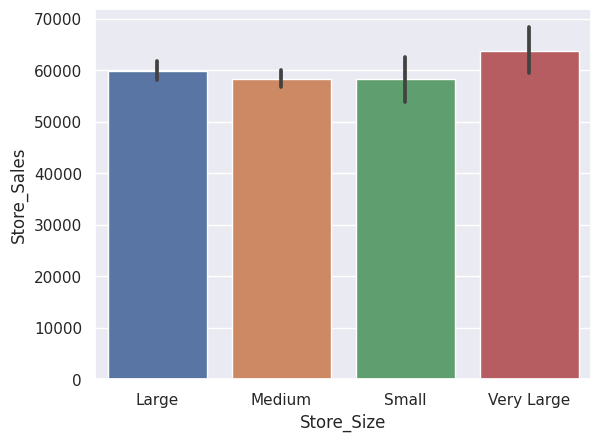

In [34]:
fig
sns.barplot(x= market_df["Store_Size"],y=market_df["Store_Sales"])
tight
sh

# 🧠 Data Analysis Insights

1. ### Distribution & Concentration:
   - The data is **normally distributed**.
   - Most of the **Store Areas** fall between **1250 and 1750 square yards**.
   - The **majority of the stores** in the dataset are of **Medium Size**.
   - The **rest of the columns** are **concentrated within a specific range** and have **weak relationships** with each other.

2. ### Item Availability:
   - **Item Availability increases** as the **Store Area increases**.
   - **Very Large stores** have the **highest item availability**, indicating a strong dependency between **Store Size** and **Item Availability**.

3. ### Customer Count:
   - The **number of customers** is **almost the same** across all store sizes.
   - Customer count **does not appear to be affected** by the store size.

4. ### Sales:
   - **Sales are generally similar** across different store sizes.
   - However, **Very Large stores** have the **highest sales**, which can be attributed to their **higher item availability**.
